In [1]:
# model1name = "Palma2021"
# model2name = "Ikonomi2020"
model1name = "Bonzanni2013"
model2name = "Krumsiek2011"
merged_prob_name =  model1name + "_" + model2name

In [22]:
from rpy2.robjects.packages import importr
boolnet = importr("BoolNet")
from rpy2.robjects.pandas2ri import rpy2py
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.gridspec import GridSpec
import matplotlib.patches as patches
import matplotlib.colors as colors
# # To increase the IOPub data rate limit, for the Markov simulation
# !jupyter notebook --NotebookApp.iopub_data_rate_limit=20000000

In [ ]:
def read_file(filepath):
    with open(filepath, 'r') as file:
        lines = file.readlines()
    # Skip the first line if it's a header (starts with 'target')
    if lines[0].startswith('targets'):
        lines = lines[1:]
    # Create a dictionary where each gene is a key and its rule is a value
    data = {}
    for line in lines:
        parts = line.strip().split(',')
        if len(parts) < 2:
            continue
        gene, rule = parts[0], ','.join(parts[1:]).strip()
        data[gene] = rule
    return data

def combine_files(file1, file2):
    # Read both files
    data1 = read_file(file1)
    data2 = read_file(file2)

    # All unique genes
    all_genes = set(data1.keys()).union(data2.keys())
    result = []

    for gene in all_genes:
        if gene in data1 and gene in data2:
            # Gene in both files, write two lines
            result.append(f'{gene},{data1[gene]},0.5')
            result.append(f'{gene},{data2[gene]},0.5')
        elif gene in data1:
            # Gene only in first file
            result.append(f'{gene},{data1[gene]},1')
        elif gene in data2:
            # Gene only in second file
            result.append(f'{gene},{data2[gene]},1')

    return result
    
def write_result(result, output_file):
    with open(output_file, 'w') as file:
        file.write('targets, factors\n')
        for line in result:
            file.write(f'{line}\n')
            
file1_path = "./Models/" + model1name + '.txt'
file2_path = "./Models/" + model2name + '.txt'
output_file_path = "./Models/merged_Prob_" + merged_prob_name + '.txt'

# Combine and write the result
combined_data = combine_files(file1_path, file2_path)
write_result(combined_data, output_file_path)

In [3]:
# Load the PBN
net = boolnet.loadNetwork("./Models/merged_Prob_" + merged_prob_name + ".txt")
print(net)

Probabilistic Boolean network with 18 genes

Involved genes:
TAL1 EGR1 SMAD6 SPI1 NAB1 GATA1 JUN ZFPM1 RUNX1 EGR2 FLI1 GATA2 ERG KLF1 GFI1 CBFA2T3 CEBPA HHEX

Transition functions:

Alternative transition functions for gene TAL1:
TAL1 = FLI1 | ERG | (FLI1 & GATA2) | (TAL1 & GATA1) | (GATA2 & TAL1) ( probability: 0.5)
TAL1 = GATA1 & !SPI1 ( probability: 0.5)

Alternative transition functions for gene EGR1:
EGR1 = (SPI1 & JUN) & !GFI1 ( probability: 1)

Alternative transition functions for gene SMAD6:
SMAD6 = ERG | FLI1 | (TAL1 & GATA2) ( probability: 1)

Alternative transition functions for gene SPI1:
SPI1 = FLI1 & !(SPI1 & GATA1) ( probability: 0.5)
SPI1 = (CEBPA | SPI1) & !(GATA1 | GATA2) ( probability: 0.5)

Alternative transition functions for gene NAB1:
NAB1 = (SPI1 & JUN) & !GFI1 ( probability: 1)

Alternative transition functions for gene GATA1:
GATA1 = (TAL1 & GATA1) & !(SPI1 & GATA1) ( probability: 0.5)
GATA1 = (GATA1 | GATA2 | FLI1) & !SPI1 ( probability: 0.5)

Alternative tra

In [4]:
# perform a Markov chain simulation
sim = boolnet.markovSimulation(net)

In [5]:
# convert R/rpy2 DataFrame to pd
df = rpy2py(sim[0])
df

TAL1,EGR1,SMAD6,...,CEBPA,HHEX,Probability
0,0,0,...,0,0,0.210560
1,0,0,,0,0,0.394720
1,0,0,,0,0,0.394720


In [46]:
df.to_csv("./SimulationResults/attr_merged_prob_" + merged_prob_name + ".csv")

In [37]:
# Define the order of columns as in the paper
column_order_1 = ['SMAD6','HHEX','RUNX1','CBFA2T3','ERG','GATA1','GATA2','ZFPM1', 'TAL1', 'SPI1', 'FLI1']
column_order_2 = ['GATA1', 'GATA2', 'ZFPM1', 'TAL1', 'SPI1', 'FLI1','KLF1','CEBPA','GFI1','NAB1','EGR2','JUN','EGR1']
column_order_merged = ['SMAD6','HHEX','RUNX1','CBFA2T3','ERG','GATA1','GATA2','ZFPM1', 'TAL1', 'SPI1', 'FLI1', 'KLF1','CEBPA','GFI1','NAB1','EGR2','JUN','EGR1']

# Model1 results
df1 = pd.read_csv("./SimulationResults/attr_" + model1name + ".csv", index_col = 0)
df1.index = df1.index.str.replace('S', 'B')
df1 = df1[column_order_1]

# Model2 results
df2 = pd.read_csv("./SimulationResults/attr_" + model2name + ".csv", index_col = 0)
df2.index = df2.index.str.replace('S', 'K')
df2 = df2[column_order_2]

# Merged results
df.index = ["M" + str(i) for i in range(1, 1+len(df))]
df_prob = df[column_order_merged]
df_prob = pd.concat([df_prob, df1, df2])

In [ ]:
# Visualize
cmap = ListedColormap(['blue', 'red'])
g = sns.clustermap(df_prob.fillna(0), method='ward', metric='euclidean', cmap=cmap, linewidths=0.5, linecolor='black', figsize=(8, 15), cbar=False, col_cluster=True)
g.ax_heatmap.set_title('Clustered Heatmap - Merged_PBN')
g.ax_heatmap.tick_params(axis='y', labelsize=10) 
g.ax_heatmap.tick_params(axis='x', labelsize=8)  
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")  # Rotate x-tick labels for better readability
g.cax.set_visible(False)

# Determine the color based on the label text
def get_ylabel_color(label):
    if label.startswith('B'):
        return 'blue'
    elif label.startswith('K'):
        return 'orange'
    elif label.startswith('M'):
        return 'green'
    else:
        return 'black'  # Default color
        
def get_xlabel_color(label):
    if label in set(column_order_merged) - set(column_order_1):
        return 'orange'
    elif label in set(column_order_merged) - set(column_order_2):
        return 'blue'
    else:
        return 'green'
        
# Set the color of labels based on their text
for label in g.ax_heatmap.get_yticklabels():
    label.set_color(get_ylabel_color(label.get_text()))
for label in g.ax_heatmap.get_xticklabels():
    label.set_color(get_xlabel_color(label.get_text()))
plt.show()

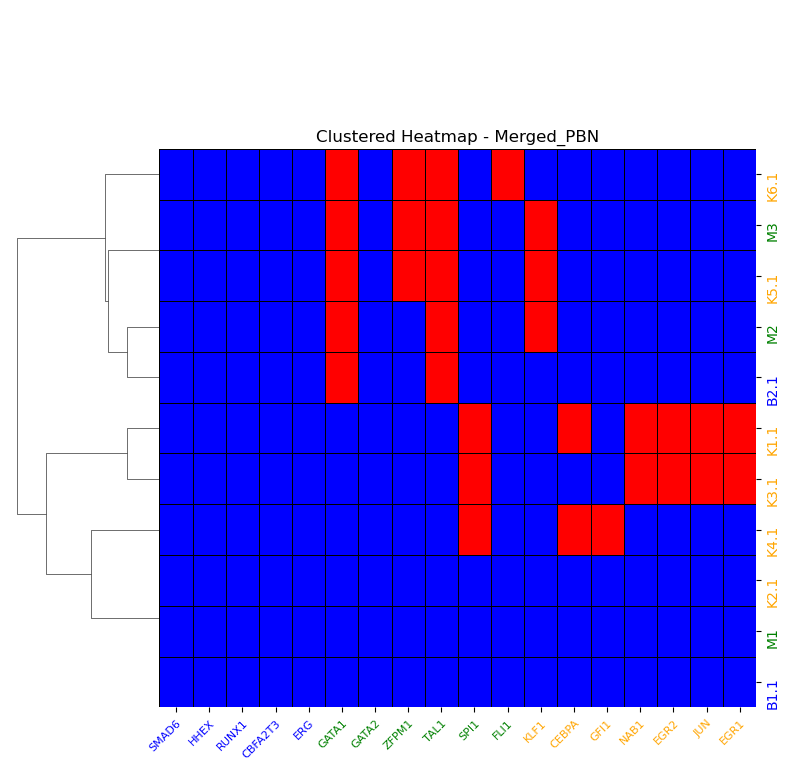

In [44]:
# Model1 results
df1 = pd.read_csv("./SimulationResults/attr_" + model1name + "_simple.csv", index_col = 0)
df1.index = df1.index.str.replace('S', 'B')
df1 = df1[column_order_1]

# Model2 results
df2 = pd.read_csv("./SimulationResults/attr_" + model2name + ".csv", index_col = 0)
df2.index = df2.index.str.replace('S', 'K')
df2 = df2[column_order_2]

# Merged results
df.index = ["M" + str(i) for i in range(1,1+len(df))]
df_prob = df[column_order_merged]
df_prob = pd.concat([df_prob, df1, df2])


/tmp/ipykernel_240/3373924770.py:48: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = patches.Rectangle((j, i), 1, 1, fill=True, color='lightgrey', hatch='//', edgecolor='black', linewidth=0.5)


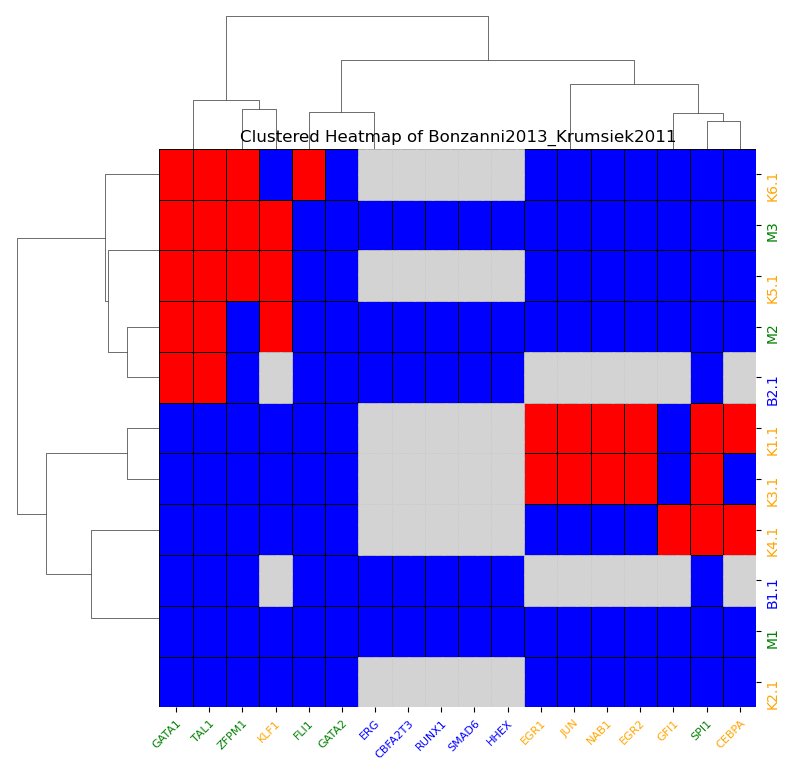

In [47]:
def heatmap(df, figsize=(8, 8)):
    # Fill NaN values
    na_value = -10e-10
    df_filled = df.fillna(na_value)
    
    # Create a custom colormap: blue for 0, red for 1, grey for NaN
    cmap = colors.ListedColormap(['grey', 'blue', 'red'])  # Blue for 0, Red for 1, Grey for NaN
    bounds = [na_value, 0, 1, 2]  # Boundaries to separate colors
    norm = colors.BoundaryNorm(bounds, cmap.N)
    
    # Create the clustermap
    g = sns.clustermap(df_filled, method='ward', metric='euclidean', cmap=cmap, norm=norm,
                       linewidths=0.5, linecolor='black', figsize=figsize, cbar=False, col_cluster=True)
    g.ax_heatmap.set_title('Clustered Heatmap of ' + model1name + "_" + model2name)
    g.ax_heatmap.tick_params(axis='y', labelsize=10)
    g.ax_heatmap.tick_params(axis='x', labelsize=8)
    plt.setp(g.ax_heatmap.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")  # Rotate x-tick labels
    g.cax.set_visible(False)

    # Determine the color based on the label text
    def get_ylabel_color(label):
        if label.startswith('B'):
            return 'blue'
        elif label.startswith('K'):
            return 'orange'
        elif label.startswith('M'):
            return 'green'
        else:
            return 'black'  # Default color
    def get_xlabel_color(label):
        if label in set(column_order_merged) - set(column_order_1):
            return 'orange'
        elif label in set(column_order_merged) - set(column_order_2):
            return 'blue'
        else:
            return 'green'
            
    # Set the color of labels based on their text
    for label in g.ax_heatmap.get_yticklabels():
        label.set_color(get_ylabel_color(label.get_text()))
    for label in g.ax_heatmap.get_xticklabels():
        label.set_color(get_xlabel_color(label.get_text()))
    
    # Add slashes on NA grid cells based on clustered positions
    for (i, j), val in np.ndenumerate(g.data2d):
        if val == na_value:
            # Create a rectangle patch with hatch and light grey fill
            rect = patches.Rectangle((j, i), 1, 1, fill=True, color='lightgrey', hatch='//', edgecolor='black', linewidth=0.5)
            g.ax_heatmap.add_patch(rect)
    
    plt.show()

heatmap(df_prob)